# The Sparks Foundation (GRIP)

## Data Science and Business Analytics Intern

## Author : Shubham Mehar

## Task5:Perform "Exploratory Data Analysis" on dataset "Indian Premier League"

### As a sport analysts, find out the most successful teams, players and factor contributing win or loss of a team.
## Suggest team or players a company should endorse for its products.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to avoid warning msg
import warnings
warnings.filterwarnings('ignore')

Dataset link:- https://bit.ly/34SRn3b

In [2]:
# Reading the csv file
ipl_matches=pd.read_csv("matches.csv")

In [3]:
#Checking the dataframe
ipl_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Checking dimensionality
ipl_matches.shape

(756, 18)

In [5]:
#Checking duplicates in dataframe
ipl_matches.duplicated().sum()

0

In [6]:
#Checking missing values
ipl_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

We have (756 rows,18columns) and in third umpire column we have 637 null values so this column is not usefull.

In [7]:
#removing umpire3 column from dataframe
ipl_matches.drop(columns='umpire3',inplace= True)

In [8]:
#Descriptive Statistics
ipl_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
#Checking column names
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

# Data Preparation

In [10]:
#Checking unique values in city column
ipl_matches["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [11]:
#Checking unique values in team1 Column
ipl_matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Rising pune supergiants have two different spelling but it is a same team.

Deccan chargers and Sunrisers hyderabad have different teams and played in different season.Same with Delhi Capital and Delhi Capitals.

In [12]:
#Replacing team RPS name correctly
ipl_matches = ipl_matches.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 

In [13]:
ipl_matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [14]:
ipl_matches["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Delhi Capitals'],
      dtype=object)

In [15]:
#Checking venues name 
ipl_matches["venue"].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [16]:
#Checking number of venues from overall seasons
ipl_matches["venue"].nunique()

41

**Venues that are same but mentioned in different names.**

'Rajiv Gandhi International Stadium, Uppal'= 'Rajiv Gandhi Intl. Cricket Stadium'

'MA Chidambaram Stadium, Chepauk' = 'M. A. Chidambaram Stadium'

'Punjab Cricket Association IS Bindra Stadium, Mohali' = 'Punjab Cricket Association Stadium, Mohali'

'M Chinnaswamy Stadium' = 'M. Chinnaswamy Stadium'

'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' ='ACA-VDCA Stadium'


In [17]:
#Correcting venues name

ipl_matches =ipl_matches.replace(to_replace="Rajiv Gandhi International Stadium, Uppal", value="Rajiv Gandhi Intl. Cricket Stadium")

ipl_matches =ipl_matches.replace(to_replace="MA Chidambaram Stadium, Chepauk", value="M. A. Chidambaram Stadium") 

ipl_matches =ipl_matches.replace(to_replace="Punjab Cricket Association IS Bindra Stadium, Mohali", value="Punjab Cricket Association Stadium, Mohali") 

ipl_matches =ipl_matches.replace(to_replace="M. Chinnaswamy Stadium", value="M Chinnaswamy Stadium") 

ipl_matches =ipl_matches.replace(to_replace="ACA-VDCA Stadium", value="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium")  

In [18]:
ipl_matches["venue"].unique()

array(['Rajiv Gandhi Intl. Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Punjab Cricket Association Stadium, Mohali',
       'Green Park', 'Sawai Mansingh Stadium',
       'M. A. Chidambaram Stadium', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Comple

# Exploratory Data Analysis

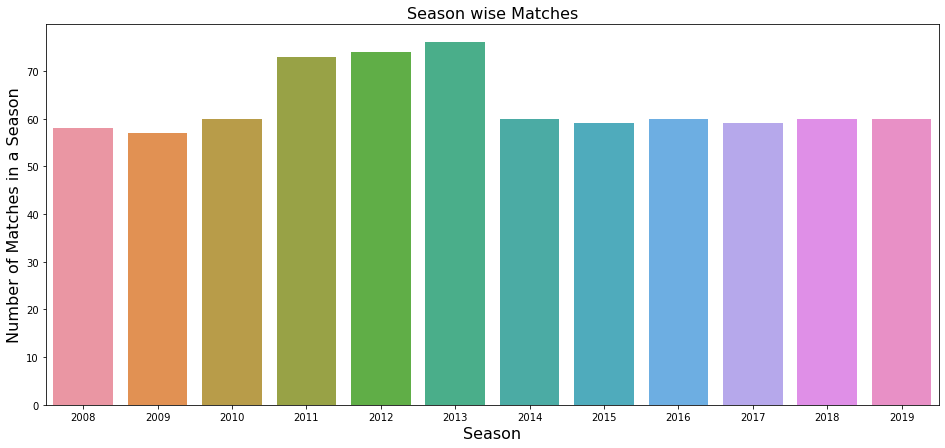

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [19]:
#Plotting number of matches season wise

plt.figure(figsize=(16,7))
sns.countplot(x='season', data=ipl_matches)
plt.title("Season wise Matches",fontsize=16)
plt.xlabel("Season",fontsize=16)
plt.ylabel("Number of Matches in a Season",fontsize=16)
plt.show()

ipl_matches["season"].value_counts()

Most matches were played in season2013 are 76 and least matches played in season2009 are 57.

## Number of teams played in a Season

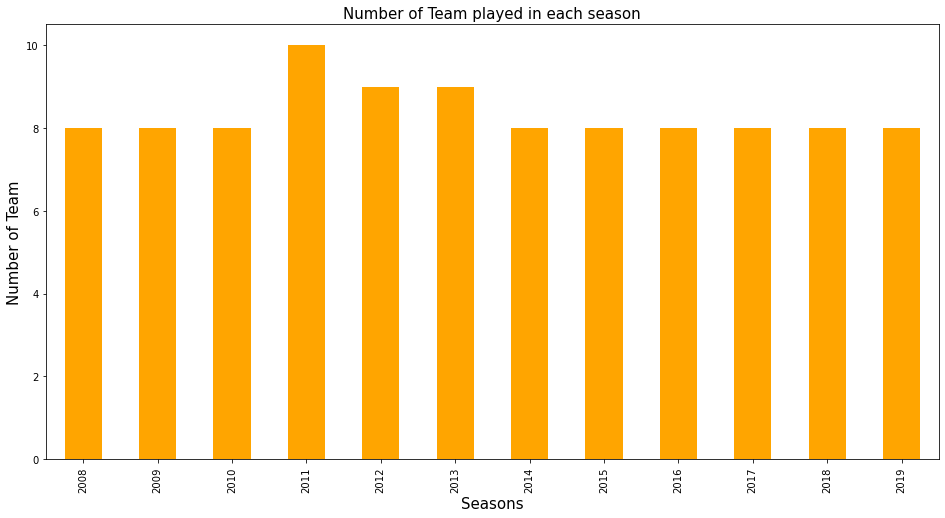

In [20]:
plt.figure(figsize=(16,8))
ipl_matches.groupby('season')['team1'].nunique().plot(kind='bar', color='Orange')
plt.title("Number of Team played in each season", fontsize=15)
plt.xlabel("Seasons", fontsize=15)
plt.ylabel("Number of Team", fontsize=15)
plt.show()

There are 10 team played in season 2011 and 9 teams in season 2012 and 2013.

In remaining season 8 team played.

## Most Matches played team in Overall seasons

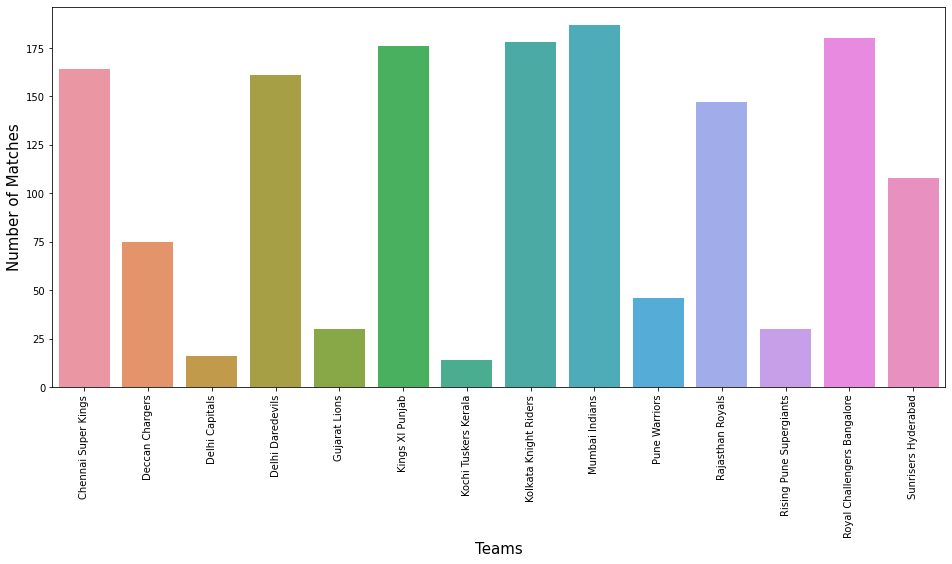

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiants         30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [21]:
mostMatchesPlayedTeam=ipl_matches["team1"].value_counts()+ipl_matches["team2"].value_counts()

#plotting
plt.figure(figsize=(16,7)) 
sns.barplot(x = mostMatchesPlayedTeam.index, y = mostMatchesPlayedTeam)
plt.xticks(rotation= 90)
plt.xlabel("Teams",fontsize = 15)
plt.ylabel("Number of Matches",fontsize = 15)
plt.show()

mostMatchesPlayedTeam

Mumbai Indians played most matches that are 187.

## Most Matches winning Team

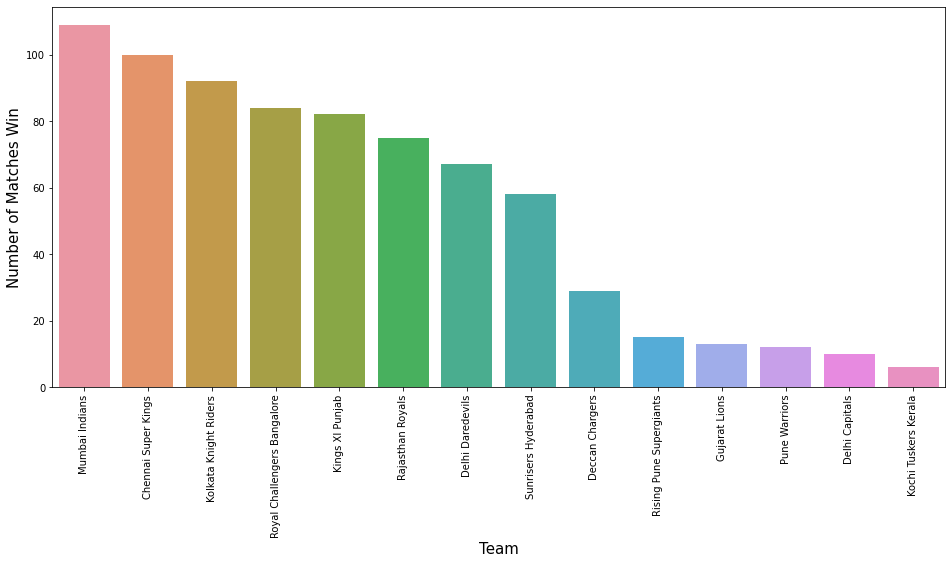

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [22]:
mostMatchwinningTeam=ipl_matches["winner"].value_counts()

#plotting
plt.figure(figsize=(16,7)) 
sns.barplot(x = mostMatchwinningTeam.index, y = mostMatchwinningTeam)
plt.xticks(rotation= 90)
plt.xlabel("Team",fontsize = 15)
plt.ylabel("Number of Matches Win",fontsize = 15)
plt.show()

mostMatchwinningTeam

Mumbai Indians has won 109 matches that are most wins by a team.

## Most matches hosting venues

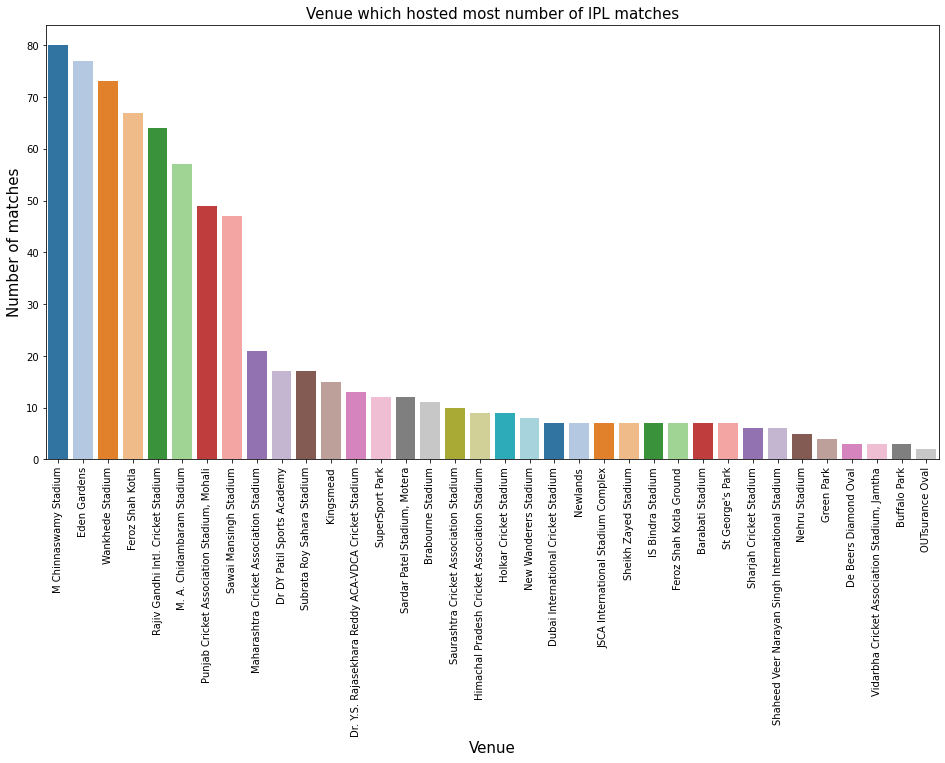

M Chinnaswamy Stadium                 80
Eden Gardens                          77
Wankhede Stadium                      73
Feroz Shah Kotla                      67
Rajiv Gandhi Intl. Cricket Stadium    64
Name: venue, dtype: int64

In [23]:
plt.figure(figsize=(16,8))
sns.countplot(x='venue',data=ipl_matches ,order=ipl_matches['venue'].value_counts().index, palette="tab20")
plt.title('Venue which hosted most number of IPL matches', fontsize=15)
plt.xlabel('Venue', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Number of matches', fontsize=15)
plt.show()

ipl_matches["venue"].value_counts().head()

M Chinnaswamy Stadium has hosted most IPL matches.

## Most Man of the Match  Winning Players

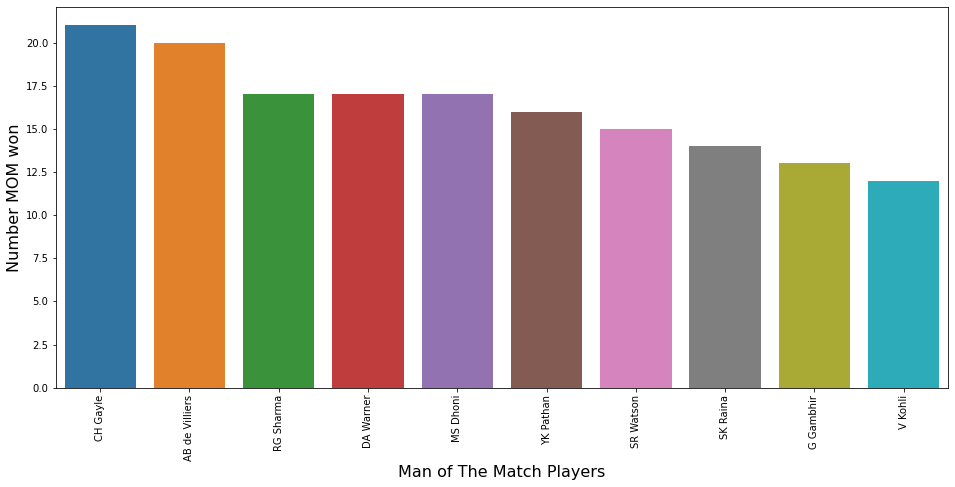

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [24]:
mom=ipl_matches['player_of_match'].value_counts()[:10]

plt.figure(figsize=(16,7))
sns.barplot(x=mom.index, y=mom, data=ipl_matches)
plt.xticks(rotation= 90)
plt.xlabel('Man of The Match Players',fontsize = 16)
plt.ylabel('Number MOM won',fontsize = 16)
plt.show()
mom

Gayle has won most IPL player of the match titles.

## Toss

field    463
bat      293
Name: toss_decision, dtype: int64




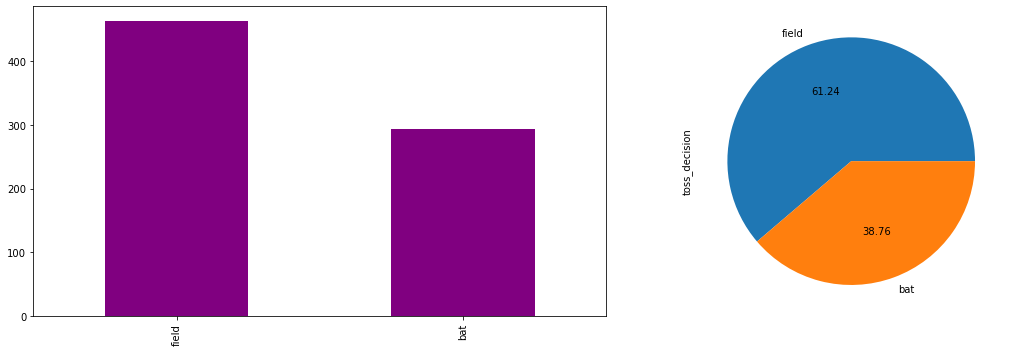

In [25]:
toss=ipl_matches['toss_decision'].value_counts()
print(toss)
print("\n")

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
(ipl_matches['toss_decision'].value_counts()).plot(kind="bar",color="purple")

plt.subplot(1,2,2)
ipl_matches['toss_decision'].value_counts().plot.pie(autopct="%.2f")
plt.tight_layout()

More than 60% times team winning toss choose to field first.

## Effect of Toss On Win and Loss

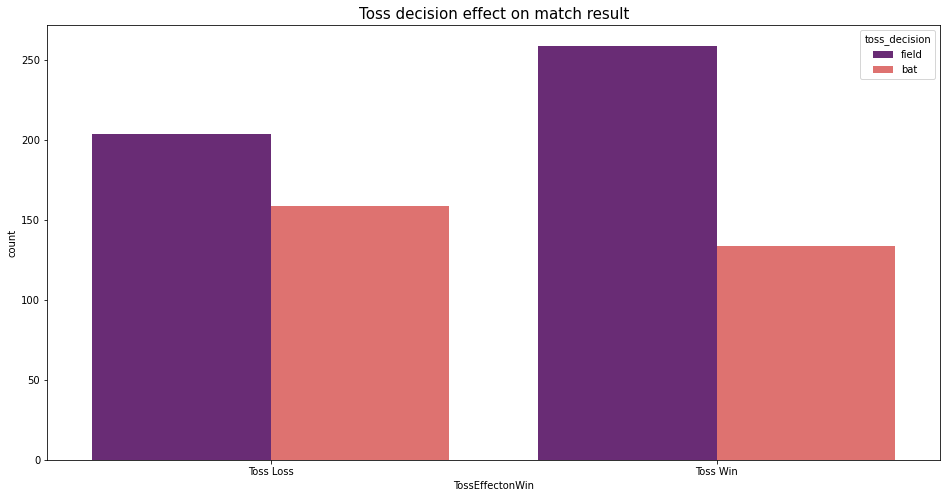

In [26]:
ipl_matches["TossEffectonWin"] = np.where((ipl_matches["toss_winner"] == ipl_matches["winner"]), 'Toss Win','Toss Loss')

plt.figure(figsize=(16,8))
sns.countplot(x="TossEffectonWin",data = ipl_matches, hue='toss_decision', palette='magma')
plt.title('Toss decision effect on match result', fontsize=15)
plt.show()


The team winning toss and electing field first win more matches.

## Most Toss winning team

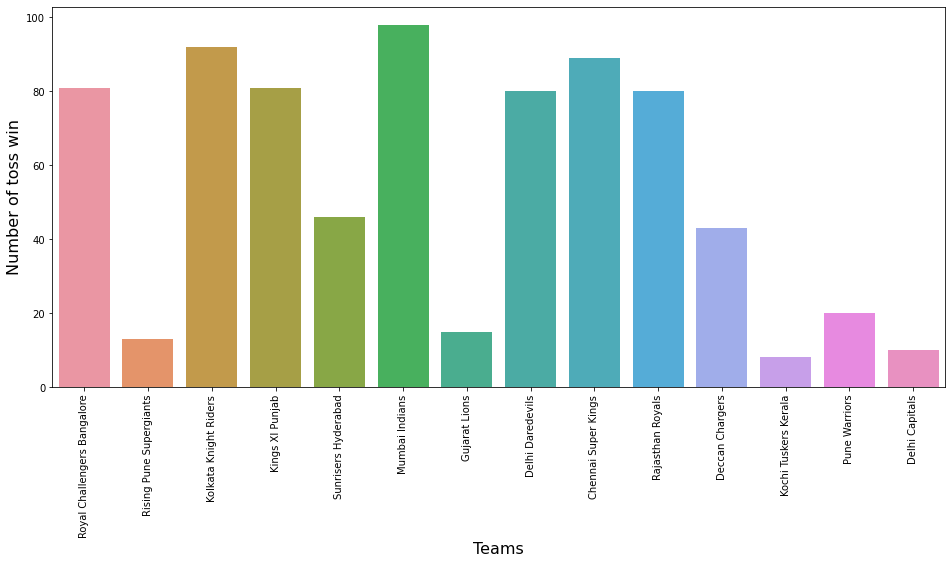

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

In [27]:
plt.figure(figsize=(16,7))
sns.countplot(x="toss_winner",data=ipl_matches)
plt.xticks(rotation=90)
plt.xlabel("Teams", fontsize=16)
plt.ylabel("Number of toss win", fontsize=16)
plt.show()

ipl_matches["toss_winner"].value_counts()

Mumbai Indians won toss 98 times which is highest in IPL.

## Teams wise preference of field or bat after winning the toss

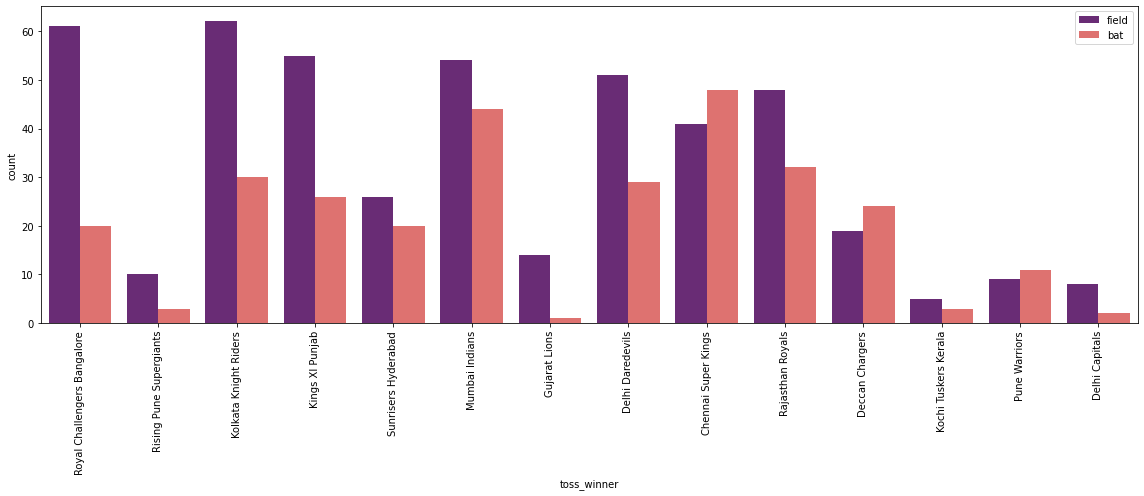

In [28]:
plt.figure(figsize=(16,7))
sns.countplot(x='toss_winner',data=ipl_matches,hue='toss_decision',palette='magma')
plt.xticks( rotation=90)
plt.legend(loc=0)
plt.tight_layout()

Most of the team prefer to field first after winning the toss.

## Finding winning % in Batting Second team

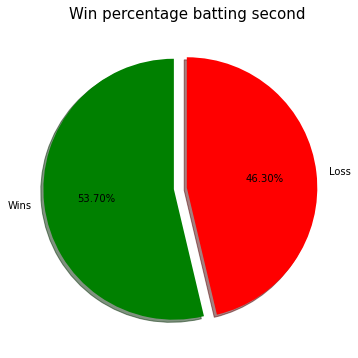

In [29]:
# Winning a match by wickets mean batting second team won the match
num_of_wins = (ipl_matches.win_by_wickets>0).sum()               
num_of_loss = (ipl_matches.win_by_wickets==0).sum()             
labels = ["Wins", "Loss"] 
total = float(num_of_wins + num_of_loss)                      
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]    

colors = ['green', 'red']                                     
explode = (0.1, 0)
plt.figure(figsize=(12,6))

# use pie plot 
plt.pie(sizes, labels=labels, explode=explode, colors=colors,autopct='%2.2f%%', shadow=True, startangle=90)

plt.title("Win percentage batting second", fontsize=15)
plt.show()

Batting second team won more than 53% matches.

## Effect of Toss win

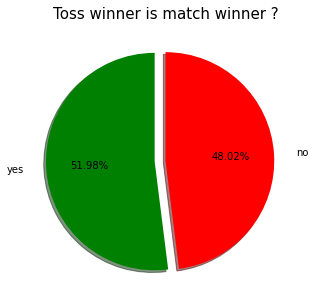

In [30]:
ipl_matches['toss_winner_is_winner'] = 'no'
ipl_matches['toss_winner_is_winner'].iloc[ipl_matches.toss_winner == ipl_matches.winner] = 'yes'

temp_series = ipl_matches.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['green', 'red']
explode = (0.1, 0)
plt.figure(figsize=(10,5))

#use pie plot
plt.pie(sizes, labels=labels, colors=colors, explode = explode, autopct='%2.2f%%', 
        shadow=True, startangle=90, labeldistance=1.2)
plt.title("Toss winner is match winner ?", fontsize=15)

plt.show()

52% times toss winning team win the match.

## Finding impact of the Toss on Teams Winning the matches

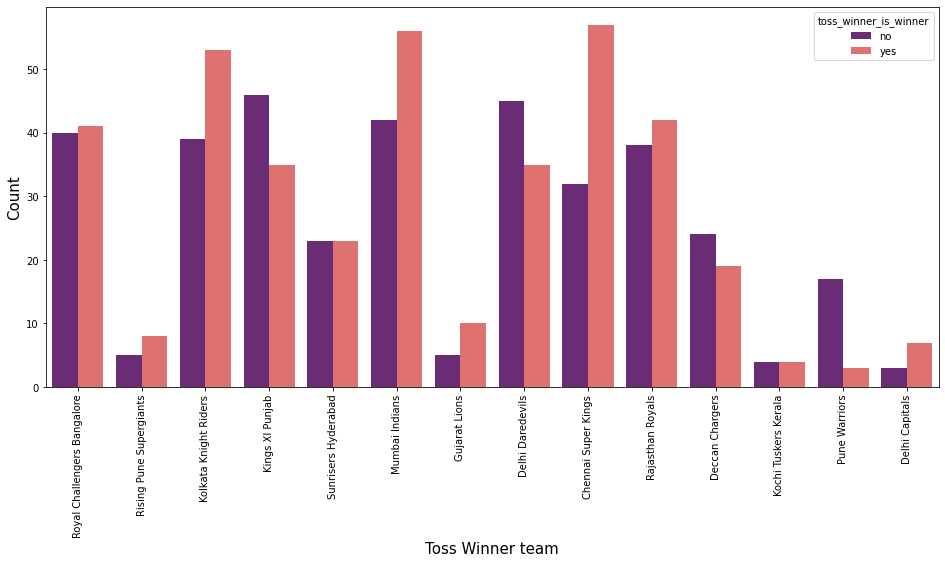

In [31]:
plt.figure(figsize=(16,7))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=ipl_matches, palette="magma")

plt.xticks(rotation=90, fontsize= 10 )
plt.xlabel("Toss Winner team", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.show()

Chennai Super kings winning toss means high probability winning the match. 

# UMPIRES

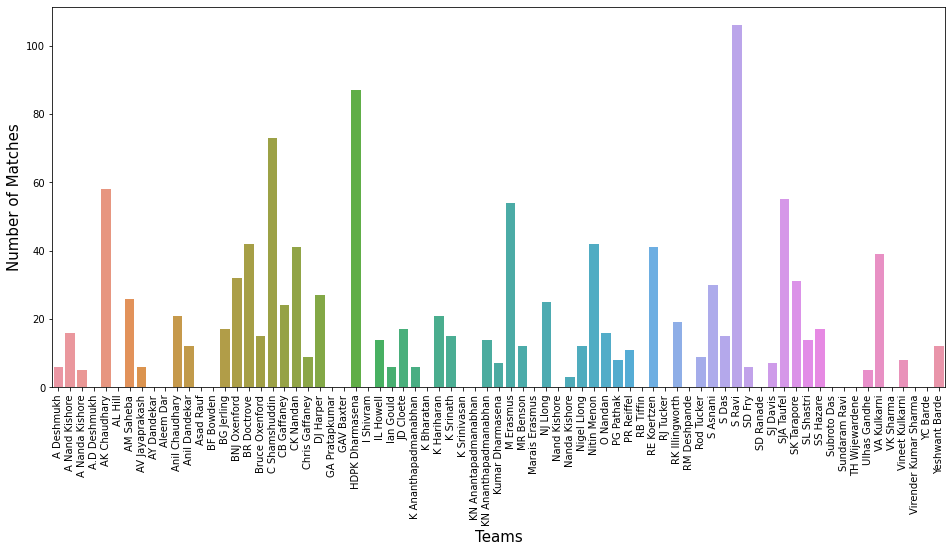

30

In [32]:
umpire=ipl_matches["umpire1"].value_counts()+ipl_matches["umpire2"].value_counts()

#plotting
plt.figure(figsize=(16,7)) 
sns.barplot(x = umpire.index, y = umpire)
plt.xticks(rotation= 90)
plt.xlabel('Teams',fontsize = 15)
plt.ylabel('Number of Matches',fontsize = 15)
plt.show()

umpire.nunique()

There are 30 umpires in IPL which have done the umpiring in the matches.

## Top 10 umpires doing umpiring in the Matches

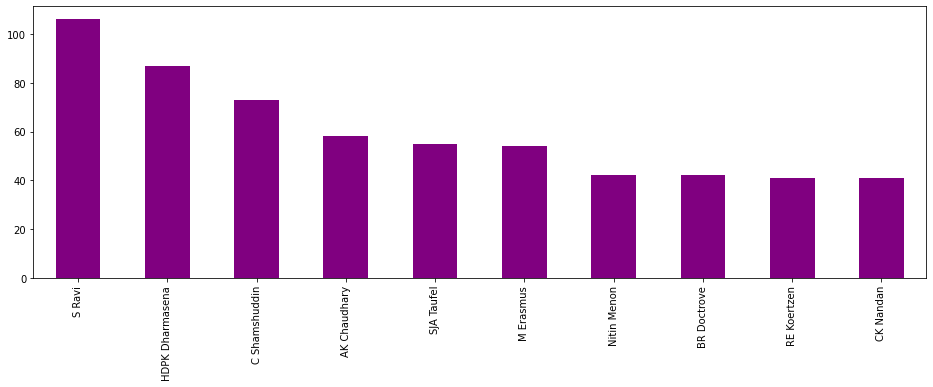

S Ravi             106.0
HDPK Dharmasena     87.0
C Shamshuddin       73.0
AK Chaudhary        58.0
SJA Taufel          55.0
M Erasmus           54.0
Nitin Menon         42.0
BR Doctrove         42.0
RE Koertzen         41.0
CK Nandan           41.0
dtype: float64

In [33]:
top10umpires=umpire.sort_values( ascending=False)
plt.figure(figsize=(16,5))
top10umpires.head(10).plot(kind="bar", color="purple")
plt.show()
top10umpires.head(10)

 S Ravi has done the greatest number of umpiring in the IPL matches.

# Match results

In [34]:
ipl_matches["result"].unique()

array(['normal', 'tie', 'no result'], dtype=object)

normal       743
tie            9
no result      4
Name: result, dtype: int64

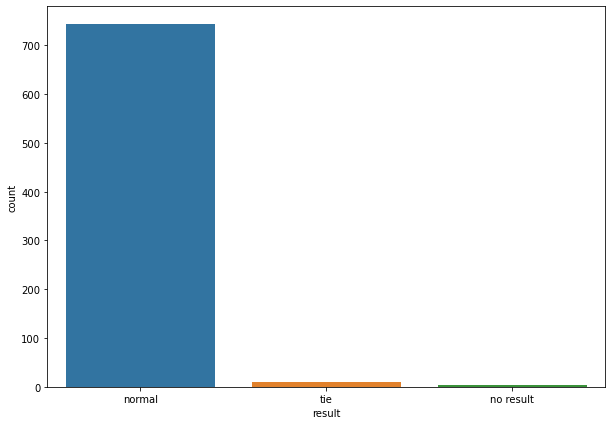

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(x="result",data=ipl_matches)
ipl_matches["result"].value_counts()

Normal mean we have winner in those matches.

Tie result means no team won the match; the scores are level.

No result means the match is interrupted due to some reason and could not be resume to play or star.

# Most IPL Trophy WInning Team

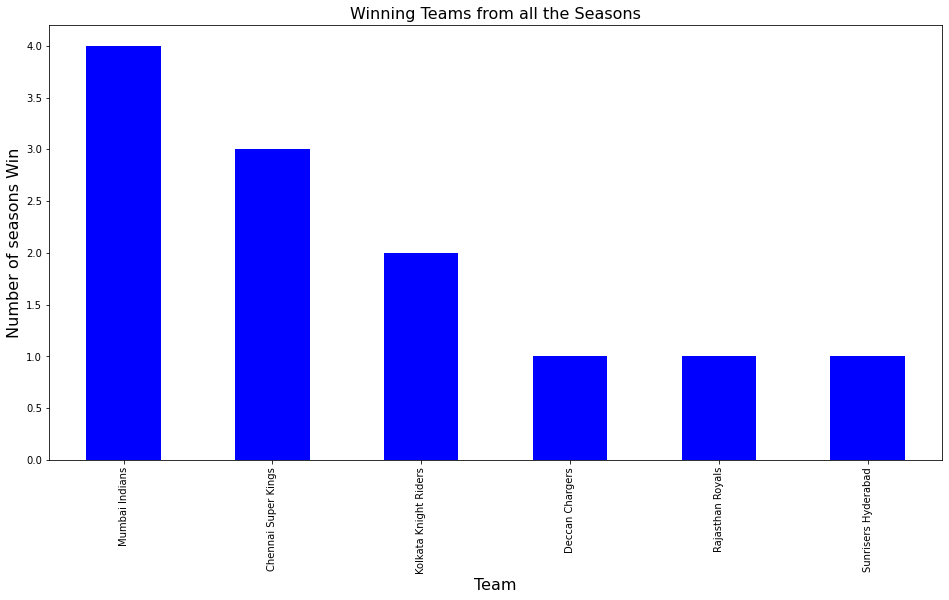

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [36]:
# Taking last match winner of each season
Winner = ipl_matches[['season', 'winner']].groupby('season')
IPL_Winner = Winner.tail(1).sort_values('season').reset_index(drop=True) 
#tail(1) because last match of season is a final match and winner of the match is a IPL winner.

#plotting
plt.figure(figsize=(16,8))
IPL_Winner['winner'].value_counts().plot(kind='bar', color='b')
plt.title("Winning Teams from all the Seasons", fontsize=16)
plt.xlabel('Team', fontsize=16)
plt.ylabel("Number of seasons Win", fontsize=16)
plt.show()

IPL_Winner

Mumbai Indians has highest IPL winning Titles, they have won 4 times.

# Importing Score dataset

In [37]:
#Readind csv file
score=pd.read_csv("deliveries.csv")

In [38]:
#Checking data
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [39]:
#Checking Dimensionality
score.shape

(179078, 21)

In [40]:
#Checking duplicates
score.duplicated().sum()

23

In [41]:
#Dropping duplicates
score.drop_duplicates(inplace=True)

In [42]:
#Checking Info
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [43]:
#Checking columns
score.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [44]:
#Finding missing values
score.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

<AxesSubplot:>

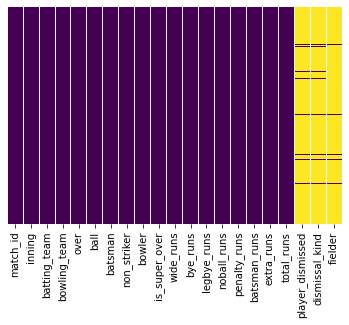

In [45]:
#to find missing values
sns.heatmap(score.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Missing values are in yellow color.

In [46]:
#dropping columns
score.drop(columns=['player_dismissed','dismissal_kind','fielder'],axis=1,inplace= True)

## Top Run Scoring Batters

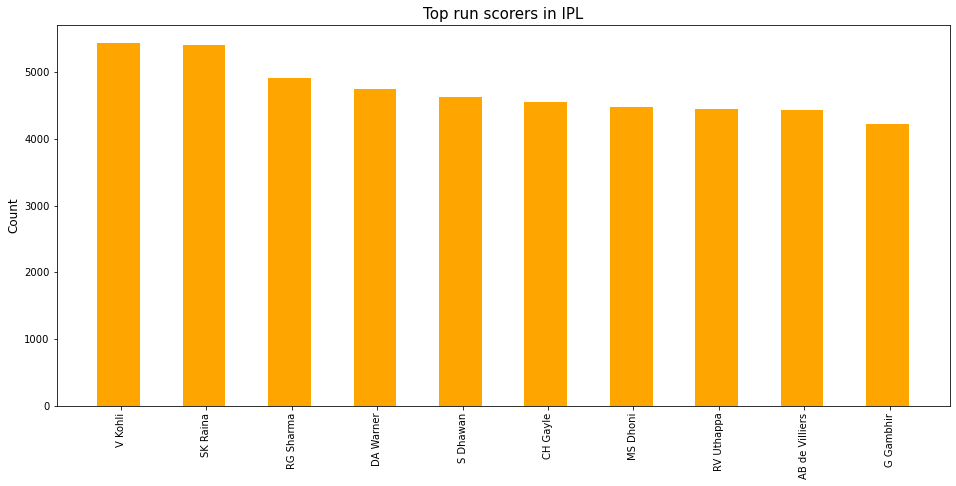

In [47]:
topRunScorer = score.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
topRunScorer = topRunScorer.iloc[:10,:]

labels = np.array(topRunScorer['batsman'])      # name of players
ind = np.arange(len(labels))               #index
width = 0.5
fig, ax = plt.subplots(figsize=(16,7))
rects = ax.bar(ind, np.array(topRunScorer['batsman_runs']), width=width, color='orange')

ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count", fontsize = 12)
ax.set_title("Top run scorers in IPL", fontsize = 15)
plt.show()

Shikhar Dhawan has scored most runs in IPL.

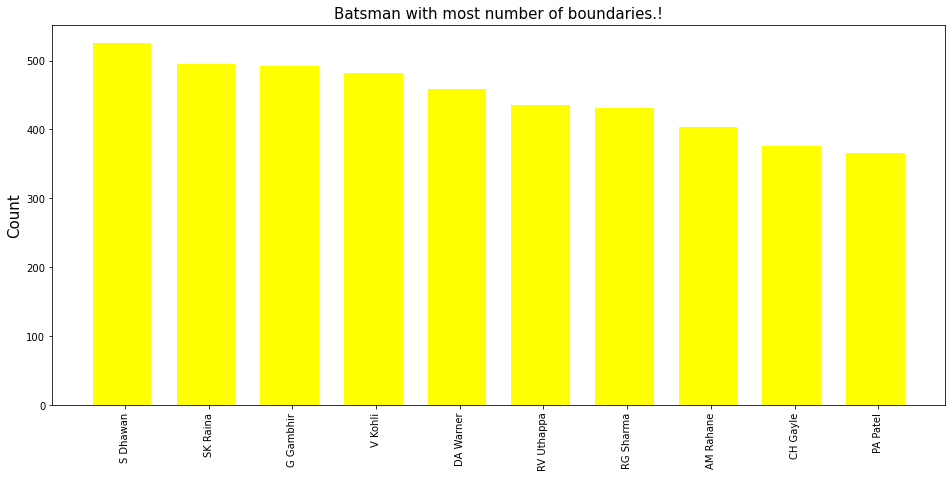

In [48]:
most4hittingBatsmen = score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
most4hittingBatsmen = most4hittingBatsmen.iloc[:10,:]

labels = np.array(most4hittingBatsmen['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(16,7))
rects = ax.bar(ind, np.array(most4hittingBatsmen['batsman_runs']), width=width, color='yellow')
ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Batsman with most number of boundaries.!", fontsize=15)
plt.show()

Shikhar Dhawan is most 4 hitting batsman.

## Most Six hitting Batsman

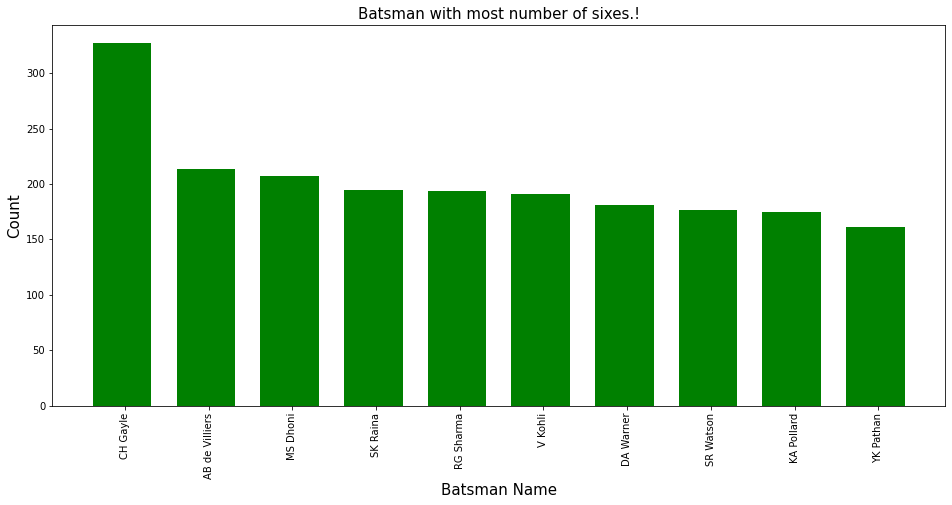

In [49]:
top6hittingBatsman = score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
top6hittingBatsman = top6hittingBatsman.iloc[:10,:]

labels = np.array(top6hittingBatsman['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(16,7))
rects = ax.bar(ind, np.array(top6hittingBatsman['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/20.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count", fontsize= 15)
ax.set_title("Batsman with most number of sixes.!", fontsize= 15)
ax.set_xlabel('Batsman Name', fontsize= 15)
plt.show()

Chris Gayle is most six hitting batsman.

## Batsman Who plays most dot balls

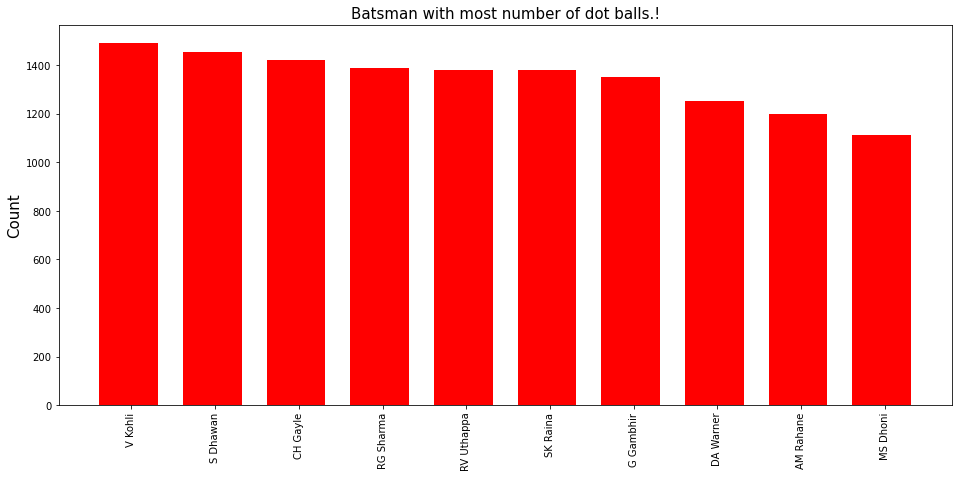

In [50]:
dotballs = score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
dotballs = dotballs.iloc[:10,:]

labels = np.array(dotballs['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(16,7))
rects = ax.bar(ind, np.array(dotballs['batsman_runs']), width=width, color='red')
ax.set_xticks(ind+((width)/20.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count", fontsize = 15)
ax.set_title("Batsman with most number of dot balls.!", fontsize = 15)
plt.show()

Virat Kohli played most dot balls.

## Number of dot balls bowled by a bowler

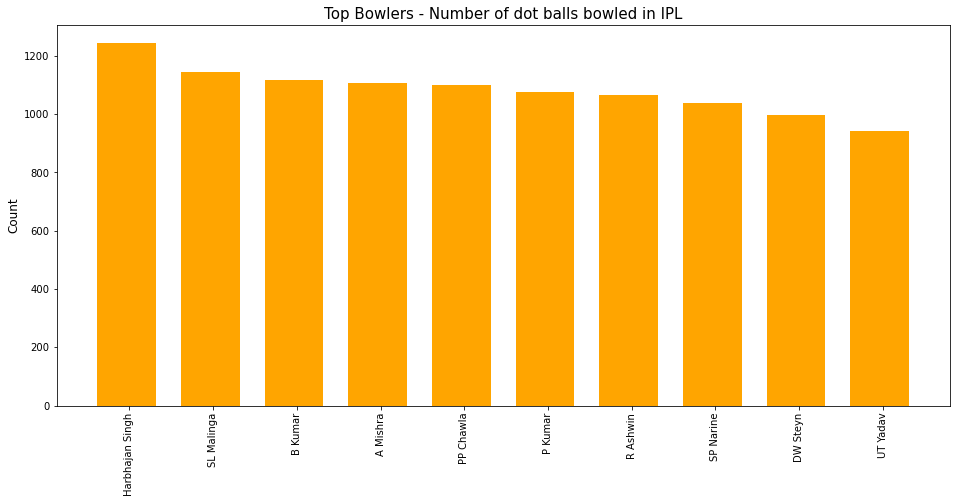

In [51]:
dotbowler = score.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
dotbowler = dotbowler.iloc[:10,:]

labels = np.array(dotbowler['bowler'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(16,7))
rects = ax.bar(ind, np.array(dotbowler['total_runs']), width=width, color='orange')
ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL", fontsize=15)
plt.show()

Harbhajan Singh has bowled most dot balls.

## Bowlers giving most extra runs 

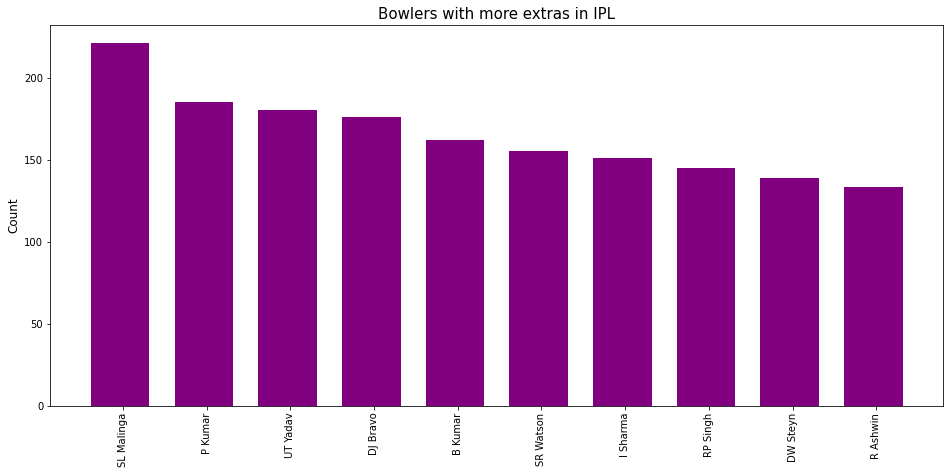

In [52]:
bowlerExtra = score.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
bowlerExtra = bowlerExtra.iloc[:10,:]

labels = np.array(bowlerExtra['bowler'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(16,7))
rects = ax.bar(ind, np.array(bowlerExtra['extra_runs']), width=width, color='purple')
ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Bowlers with more extras in IPL", fontsize=15)
plt.show()

Malinga has given most extra runs.

# Observations

	Most matches were played in season2013 are 76 and least matches played in season2009 are 57.

	There are 10 team played in season 2011 and 9 teams in season 2012 and 2013.

	In remaining season 8 team played.

	Mumbai Indians played most matches that are 187.

	Mumbai Indians has won 109 matches that are most wins by a team.

	M Chinnaswamy Stadium has hosted most IPL matches.

	Gayle has won most IPL player of the match titles.

	More than 60% times team winning toss choose to field first.

	The team winning toss and electing field first win more matches.

	Mumbai Indians won toss 98 times which is highest in IPL.

	Most of the team prefer to field first after winning the toss.

	Batting second team won more than 53% matches.

	52% times toss winning team win the match.

	Chennai Super kings winning toss means high probability winning the match.

	There are 30 umpires in IPL which have done the umpiring in the matches.

	S Ravi has done the greatest number of umpiring in the IPL matches.

	Normal mean we have winner in those matches.

	Tie result means no team won the match; the scores are level.

	No result means the match is interrupted due to some reason and could not be resume to play or star.

	Mumbai Indians has highest IPL winning Titles, they have won 4 times.

	Shikhar Dhawan has scored most runs in IPL.

	Shikhar Dhawan is most 4 hitting batsman. 

	Chris Gayle is most six hitting batsman.

	Virat Kohli played most dot balls.

	Harbhajan Singh has bowled most dot balls.

	Malinga has given most extra runs.

## As a sport analysts, find out the most successful teams, players and factor contributing win or loss of a team.

## Suggest team or players a company should endorse for its products.
The most successfull teams are Mumbai Indians, Chennai Super Kings and Kolkata Knight riders.

The most successfull players are V Kohli, Shikhar Dhawan, Gautam Gambhir, Suresh Raina, Harbhajan Singh, Gayle, AB Devilliers, Rohit Sharma, Mahendra Singh Dhoni, Malinga, Amit Mishra these all are top performers players.

Above mentioned teams and players a company should endorse for its products.

Toss plays a vital role in winning the matches.

Batting Second team won more than 60%.

